## LOAD

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
info_df_TRAIN = pd.read_csv("Traveldata_Train.csv")
response_df_TRAIN = pd.read_csv("Surveydata_Train.csv")

info_df_TEST = pd.read_csv("Traveldata_Test.csv")
response_df_TEST = pd.read_csv("Surveydata_Test.csv")

In [3]:
print("TRAIN:")
print(info_df_TRAIN.shape)
print(response_df_TRAIN.shape)
print("-" * 30)
print("TEST:")
print(info_df_TEST.shape)
print(response_df_TEST.shape)

TRAIN:
(94379, 9)
(94379, 17)
------------------------------
TEST:
(35602, 9)
(35602, 16)


In [4]:
info_df_TRAIN.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [5]:
response_df_TRAIN.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


## MERGE

In [6]:
print(info_df_TRAIN['ID'].min(), info_df_TRAIN['ID'].max())
print(response_df_TRAIN['ID'].min(), response_df_TRAIN['ID'].max())

98800001 98894379
98800001 98894379


In [7]:
print(info_df_TEST['ID'].min(), info_df_TEST['ID'].max())
print(response_df_TEST['ID'].min(), response_df_TEST['ID'].max())

99900001 99935602
99900001 99935602


In [8]:
df_TRAIN = info_df_TRAIN.merge(response_df_TRAIN, how='inner', on='ID')
df_TEST = info_df_TEST.merge(response_df_TEST, how='inner', on='ID')
print(df_TRAIN.shape)
print(df_TEST.shape)

(94379, 25)
(35602, 24)


## INSPECT

In [9]:
print("TRAIN:")
print(df_TRAIN.info())
print("-" * 50)
print("TEST:")
print(df_TEST.info())

TRAIN:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Locati

In [10]:
print("TRAIN:")
print(df_TRAIN.isnull().sum())
print("-" * 50)
print("TEST:")
print(df_TEST.isnull().sum())

TRAIN:
ID                            0
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64
--------------------------------------------------
TEST:
ID                            0
Gender                       30
Customer_Type              3383
Age                        

In [11]:
# all null
print(((df_TRAIN['Arrival_Delay_in_Mins'].isnull()) & (df_TRAIN['Departure_Delay_in_Mins'].isnull())).sum())

# all notnull
print(((~df_TRAIN['Arrival_Delay_in_Mins'].isnull()) & (~df_TRAIN['Departure_Delay_in_Mins'].isnull())).sum())

# arrival null
print(((df_TRAIN['Arrival_Delay_in_Mins'].isnull()) & (~df_TRAIN['Departure_Delay_in_Mins'].isnull())).sum())

# departure null
print(((~df_TRAIN['Arrival_Delay_in_Mins'].isnull()) & (df_TRAIN['Departure_Delay_in_Mins'].isnull())).sum())

57
94022
300
0


In [12]:
# all null
print(((df_TEST['Arrival_Delay_in_Mins'].isnull()) & (df_TEST['Departure_Delay_in_Mins'].isnull())).sum())

# all notnull
print(((~df_TEST['Arrival_Delay_in_Mins'].isnull()) & (~df_TEST['Departure_Delay_in_Mins'].isnull())).sum())

# arrival null
print(((df_TEST['Arrival_Delay_in_Mins'].isnull()) & (~df_TEST['Departure_Delay_in_Mins'].isnull())).sum())

# departure null
print(((~df_TEST['Arrival_Delay_in_Mins'].isnull()) & (df_TEST['Departure_Delay_in_Mins'].isnull())).sum())

29
35479
94
0


In [13]:
print("TRAIN:")
print(df_TRAIN.duplicated().sum())
print("-" * 50)
print("TEST:")
print(df_TEST.duplicated().sum())

TRAIN:
0
--------------------------------------------------
TEST:
0


## EDA

In [14]:
# FUNCTION

In [15]:
def histogram_boxplot(df, feature, figsize=(12, 5), kde=False, bins=None):
        
    fig, (ax_boxplot, ax_histogram) = plt.subplots(
        nrows=2,  
        sharex=True,  
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize    
    )  
    
    sns.boxplot(
        ax=ax_boxplot, x=feature, data=df, showmeans=True, color="violet"
    )  
    
    sns.histplot(
        ax=ax_histogram, x=feature, data=df, kde=kde, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        ax=ax_histogram, x=feature, data=df, kde=kde
    )  
    
    ax_histogram.axvline(
        df[feature].mean(), color="black", linestyle="--"
    )  
    
    ax_histogram.axvline(
        df[feature].median(), color="black", linestyle="--"
    ) 
    
    ax_boxplot.set_xlabel("")
    ax_histogram.set_xlabel(feature.upper())
    ax_histogram.set_ylabel("")

In [16]:
def stacked_barplot(df, feature):
    
    freq = pd.crosstab(index=df[feature], columns=df['Overall_Experience'], normalize='index')*100
    print(freq)
    print("-" * 50)
    
    freq.plot(kind='bar', figsize=(5, 2), stacked=True)
    plt.legend(bbox_to_anchor=(1, 1))
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

In [17]:
# TRAIN

In [18]:
y_TRAIN = df_TRAIN['Overall_Experience']
X_TRAIN = df_TRAIN.drop('Overall_Experience', axis=1)
X_TRAIN_numeric_cols = X_TRAIN.select_dtypes(include='number')
X_TRAIN_categorical_cols = X_TRAIN.select_dtypes(include='object')

In [19]:
# TEST 

In [20]:
X_TEST = df_TEST
X_TEST_numeric_cols = X_TEST.select_dtypes(include='number')
X_TEST_categorical_cols = X_TEST.select_dtypes(include='object')

### Univariate - Categorical Columns

In [21]:
# X_TRAIN
for col in X_TRAIN_categorical_cols.columns:
    print(X_TRAIN[col].value_counts(normalize=True))
    print("-" * 30)

Female    0.507041
Male      0.492959
Name: Gender, dtype: float64
------------------------------
Loyal Customer       0.817332
Disloyal Customer    0.182668
Name: Customer_Type, dtype: float64
------------------------------
Business Travel    0.688373
Personal Travel    0.311627
Name: Type_Travel, dtype: float64
------------------------------
Eco         0.522807
Business    0.477193
Name: Travel_Class, dtype: float64
------------------------------
Acceptable           0.224326
Needs Improvement    0.222079
Good                 0.218357
Poor                 0.160998
Excellent            0.137524
Extremely Poor       0.036716
Name: Seat_Comfort, dtype: float64
------------------------------
Green Car    0.502601
Ordinary     0.497399
Name: Seat_Class, dtype: float64
------------------------------
Good                 0.229072
Excellent            0.206954
Acceptable           0.177615
Needs Improvement    0.175426
Poor                 0.160236
Extremely Poor       0.050697
Name: Arriva

In [22]:
# y_TRAIN
y_TRAIN.value_counts(normalize=True)

1    0.546658
0    0.453342
Name: Overall_Experience, dtype: float64

In [23]:
# X_TEST
for col in X_TEST_categorical_cols.columns:
    print(X_TEST[col].value_counts(normalize=True))
    print("-" * 30)

Female    0.507956
Male      0.492044
Name: Gender, dtype: float64
------------------------------
Loyal Customer       0.817809
Disloyal Customer    0.182191
Name: Customer_Type, dtype: float64
------------------------------
Business Travel    0.693942
Personal Travel    0.306058
Name: Type_Travel, dtype: float64
------------------------------
Eco         0.518875
Business    0.481125
Name: Travel_Class, dtype: float64
------------------------------
Acceptable           0.224930
Needs Improvement    0.220096
Good                 0.219449
Poor                 0.161748
Excellent            0.136425
Extremely Poor       0.037352
Name: Seat_Comfort, dtype: float64
------------------------------
Ordinary     0.501657
Green Car    0.498343
Name: Seat_Class, dtype: float64
------------------------------
Good                 0.228057
Excellent            0.204139
Acceptable           0.181058
Needs Improvement    0.176101
Poor                 0.158968
Extremely Poor       0.051678
Name: Arriva

- INFO:
  - Loyal >> Disloyal
  - Business >> Personal
  - Female ~= Male
  - Eco ~= Business
- RESPONSE:
  - NOT SO OKAY:
    - Seat_Comfort: Acceptable > Needs Improvement > Good
    - Catering: Acceptable > Needs Improvement > Good
    - Platform_Location: Manageable > Convenient > Needs Improvement
  - OKAY:
    - Arrival_Time_Convenient: Good > Excellent > Acceptable
    - Onboard_Wifi_Service: Good > Excellent > Acceptable
    - Onboard_Entertainment: Good > Excellent > Acceptable
    - Online_Support: Good > Excellent > Acceptable
    - Ease_of_Online_Booking: Good > Excellent > Acceptable
    - Onboard_Service: Good > Excellent > Acceptable
    - Legroom: Good > Excellent > Acceptable
    - Baggage_Handling: Good > Excellent > Acceptable
    - CheckIn_Service: Good > Acceptable > Excellent
    - Cleanliness: Good > Excellent > Acceptable
    - Online_Boarding: Good > Acceptable > Excellent

### Univariate - Numeric Columns

In [24]:
# X_TRAIN

In [25]:
X_TRAIN[[*map(str, X_TRAIN_numeric_cols)]].describe()

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
count,9.437900e+04,94346.000000,94379.000000,94322.000000,94022.000000
mean,9.884719e+07,39.419647,1978.888185,14.647092,15.005222
std,2.724501e+04,15.116632,1027.961019,38.138781,38.439409
min,9.880000e+07,7.000000,50.000000,0.000000,0.000000
25%,9.882360e+07,27.000000,1359.000000,0.000000,0.000000
50%,9.884719e+07,40.000000,1923.000000,0.000000,0.000000
75%,9.887078e+07,51.000000,2538.000000,12.000000,13.000000
max,9.889438e+07,85.000000,6951.000000,1592.000000,1584.000000


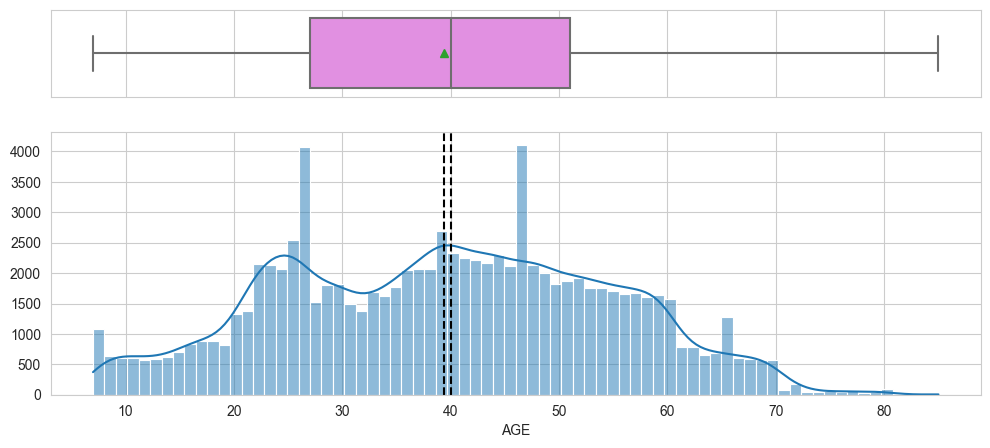

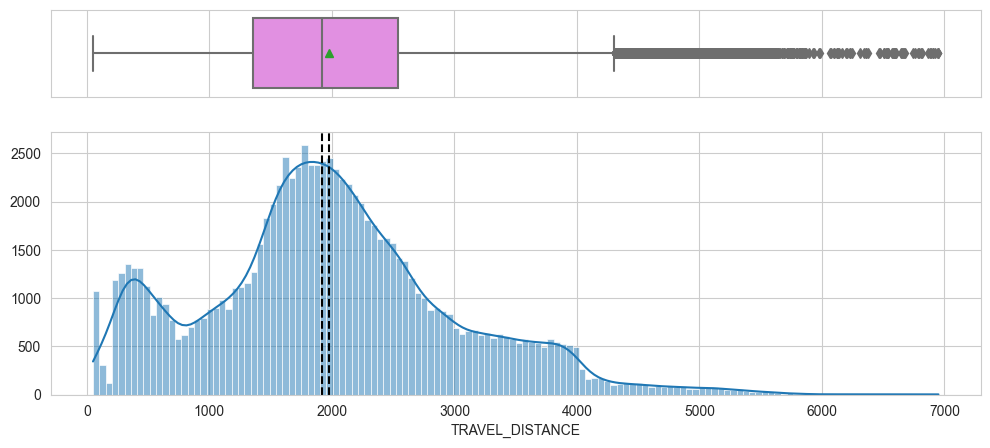

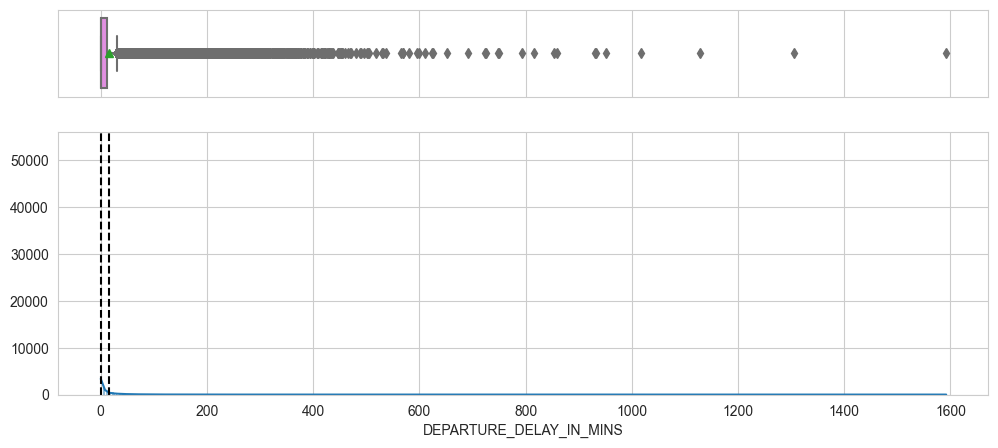

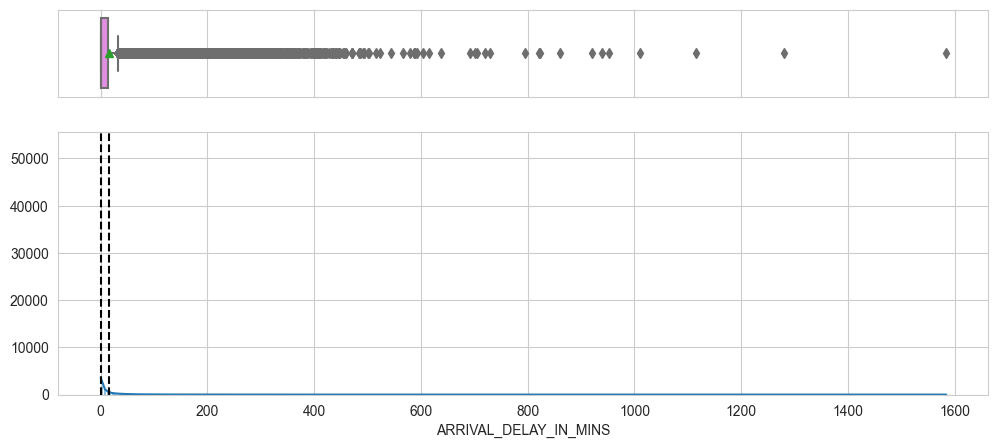

In [26]:
for col in X_TRAIN_numeric_cols.columns:
    if col != 'ID':
        histogram_boxplot(df=df_TRAIN, feature=col, kde=True)

- Age: 
  - Mean ~= Median (40), Min = 7, Max = 85
  - Bi-Modal
- Travel_Distance: 
  - Mean (1978) > Median (1923), Min = 50, Max = 6951
  - Slightly right-skewed, with some potential outliers
- Departure_Delay_in_Mins: 
  - Mean (14) >> Median (0), Min = 0, Max (1592) 
  - Highly right-skewed, with some potential outliers
- Arrival_Delay_in_Mins: 
  - Mean (15) >> Median (0), Min = 0, Max (1584) 
  - Highly right-skewed, with some potential outliers
- Total_Delay_in_Mins?

In [27]:
# X_TEST

In [28]:
X_TEST[[*map(str, X_TEST_numeric_cols)]].describe()

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
count,3.560200e+04,35591.000000,35602.000000,35573.000000,35479.000000
mean,9.991780e+07,39.446995,1987.151761,14.880696,15.308802
std,1.027756e+04,15.137554,1024.308863,37.895453,38.531293
min,9.990000e+07,7.000000,50.000000,0.000000,0.000000
25%,9.990890e+07,27.000000,1360.000000,0.000000,0.000000
50%,9.991780e+07,40.000000,1929.000000,0.000000,0.000000
75%,9.992670e+07,51.000000,2559.000000,13.000000,13.000000
max,9.993560e+07,85.000000,6868.000000,978.000000,970.000000


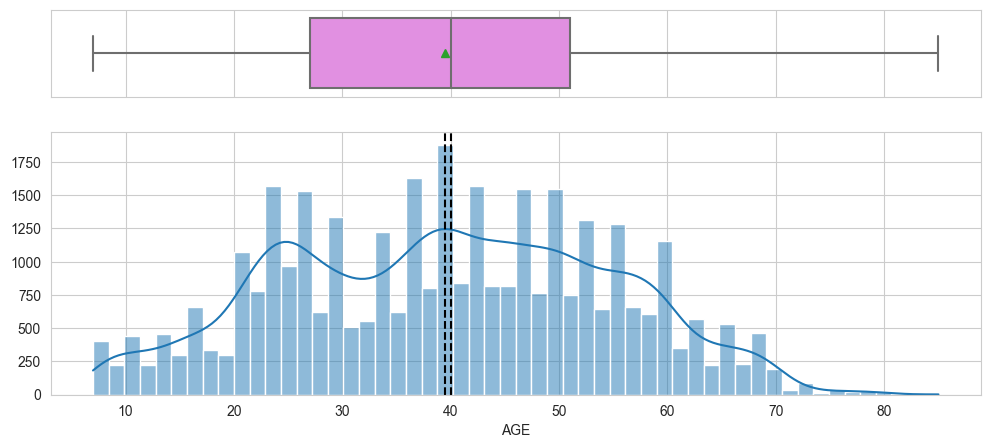

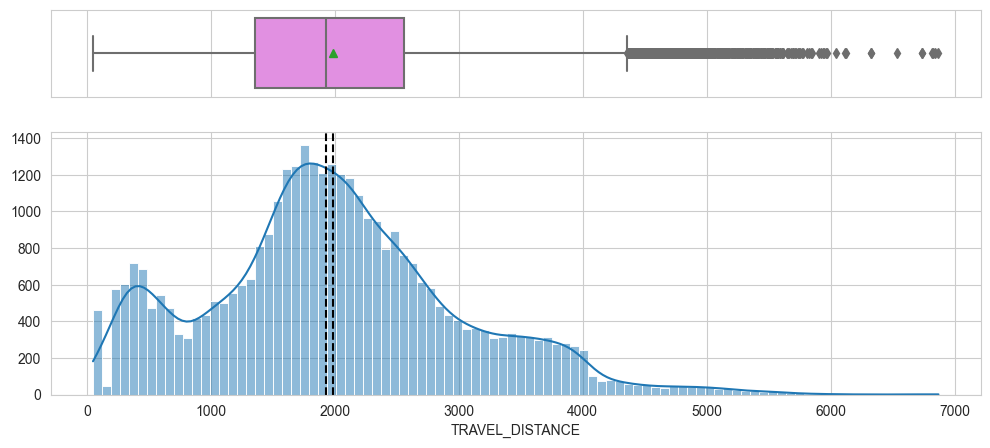

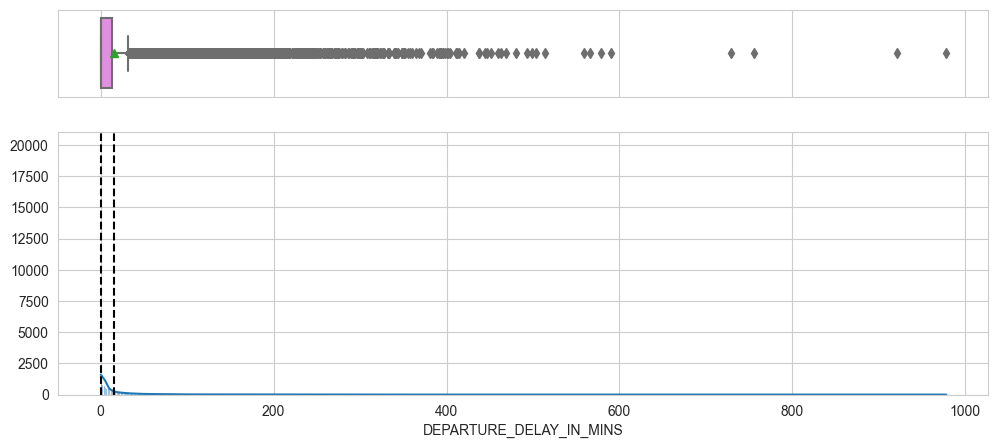

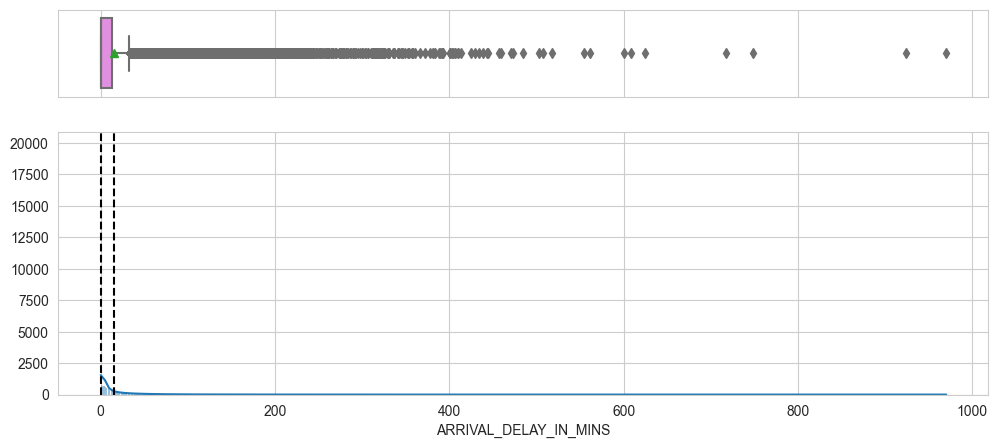

In [29]:
for col in X_TEST_numeric_cols.columns:
    if col != 'ID':
        histogram_boxplot(df=df_TEST, feature=col, kde=True)

- Age: 
  - Mean ~= Median (40), Min = 7, Max = 85
  - Bi-Modal
- Travel_Distance: 
  - Mean (1987) > Median (1929), Min = 50, Max = 6868
  - Slightly right-skewed, with some potential outliers
- Departure_Delay_in_Mins: 
  - Mean (14) >> Median (0), Min = 0, Max (978) 
  - Highly right-skewed, with some potential outliers
- Arrival_Delay_in_Mins: 
  - Mean (15) >> Median (0), Min = 0, Max (970) 
  - Highly right-skewed, with some potential outliers
- Total_Delay_in_Mins?

### Bivariate - Correlation Analysis (Numeric_X ~ Numeric_X)

In [30]:
ordinal_feature_1 = 'Platform_Location'
ordinal_feature_2 = [
    'Baggage_Handling',
    'CheckIn_Service',
    'Seat_Comfort', 
    'Arrival_Time_Convenient',
    'Cleanliness',
    'Catering', 
    'Legroom',
    'Onboard_Service',
    'Onboard_Wifi_Service',
    'Onboard_Entertainment',
    'Online_Support',
    'Ease_of_Online_Booking',
    'Online_Boarding'
]

X_TRAIN_encoded = X_TRAIN.copy()
X_TEST_encoded = X_TEST.copy()

X_TRAIN_encoded[ordinal_feature_2] = X_TRAIN_encoded[ordinal_feature_2].replace({'Extremely Poor': 0, 'Poor': 1, 'Needs Improvement': 2, 'Acceptable': 3, 'Good': 4, 'Excellent': 5})
X_TRAIN_encoded[ordinal_feature_1] = X_TRAIN_encoded[ordinal_feature_1].map({'Very Inconvenient': 0, 'Inconvenient': 1, 'Needs Improvement': 2, 'Manageable': 3, 'Convenient': 4, 'Very Convenient': 5})

X_TEST_encoded[ordinal_feature_2] = X_TEST_encoded[ordinal_feature_2].replace({'Extremely Poor': 0, 'Poor': 1, 'Needs Improvement': 2, 'Acceptable': 3, 'Good': 4, 'Excellent': 5})
X_TEST_encoded[ordinal_feature_1] = X_TEST_encoded[ordinal_feature_1].map({'Very Inconvenient': 0, 'Inconvenient': 1, 'Needs Improvement': 2, 'Manageable': 3, 'Convenient': 4, 'Very Convenient': 5})

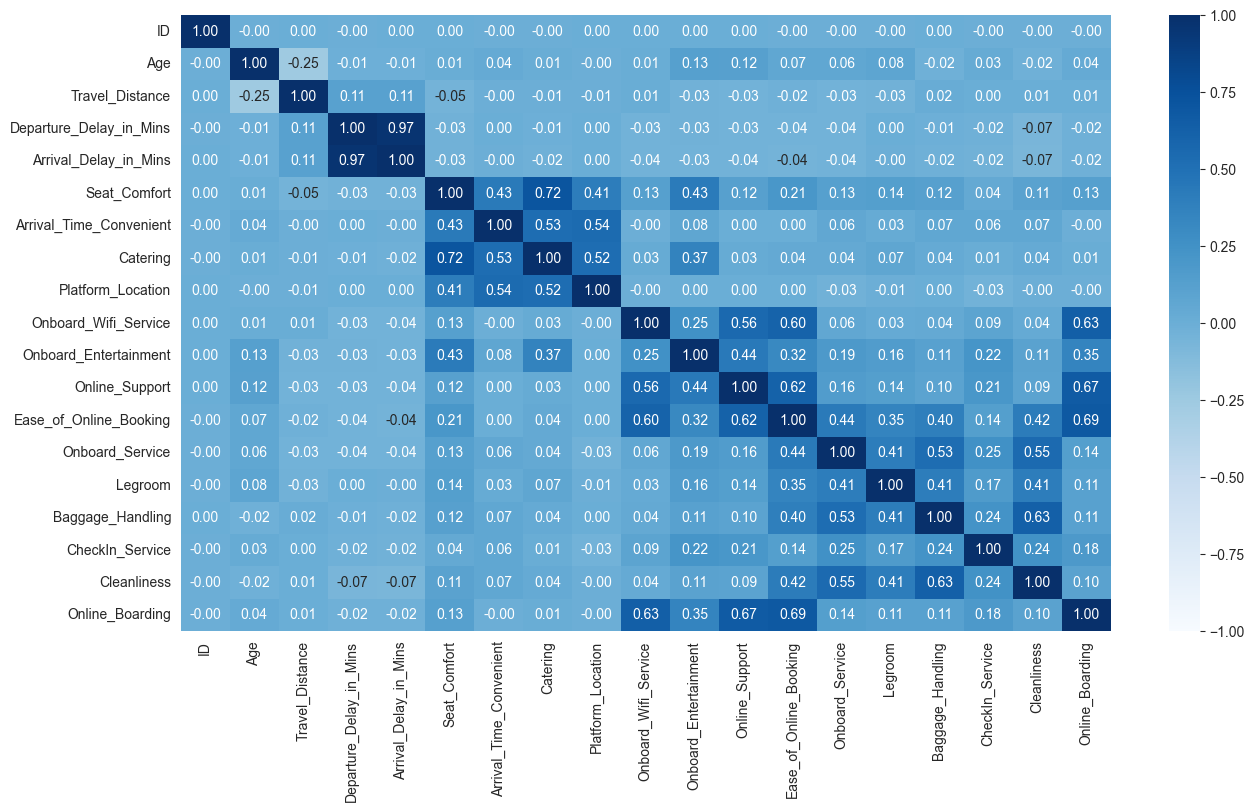

In [31]:
# X_TRAIN
plt.figure(figsize = (15, 8))
sns.heatmap(X_TRAIN_encoded.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Blues");

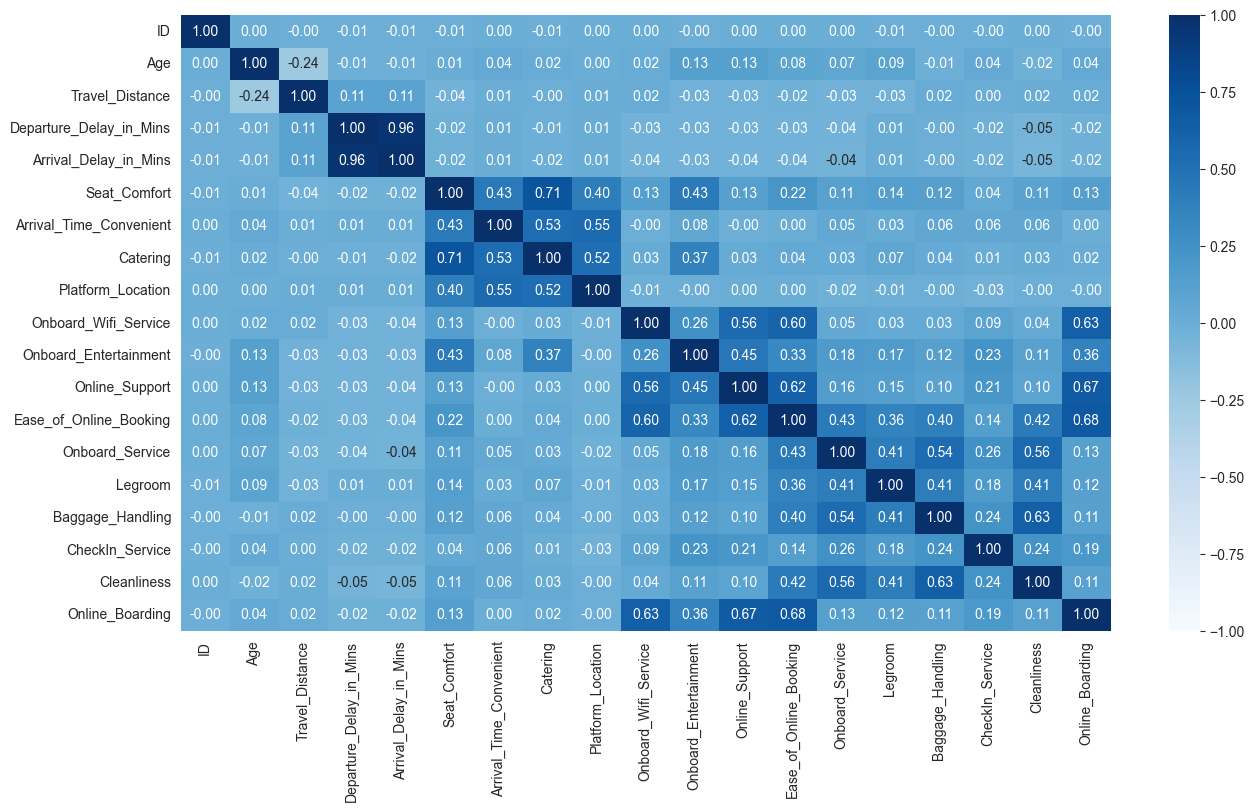

In [32]:
# X_TEST
plt.figure(figsize = (15, 8))
sns.heatmap(X_TEST_encoded.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Blues");

- Highly correlated (+): 
  - Departure_Delay_in_Mins, Arrival_Delay_in_Mins
  - Catering, Seat_Comfort
  - ...
- Moderately correlated (+):
  - Catering, Arrival_Time_Convenient
  - Catering, Platform_Location
  - Platform_Location, Arrival_Time_Convenient
  - Seat_Comfort, Platform_Location
  - Seat_Comfort, Onboard_Entertainment
  - ...
- Weakly correlated (+): Departure_Delay_in_Mins/Arrival_Delay_in_Mins, Travel_Distance
- Moderately correlated (-): Age, Travel_Distance
- No observable difference between the two datasets 

### Bivariate - Stacked Barplots (Y ~ Categorical_X)

Overall_Experience          0          1
Gender                                  
Female              34.792429  65.207571
Male                56.168391  43.831609
--------------------------------------------------


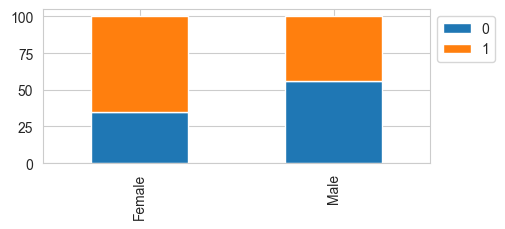

Overall_Experience          0          1
Customer_Type                           
Disloyal Customer   76.058955  23.941045
Loyal Customer      38.374175  61.625825
--------------------------------------------------


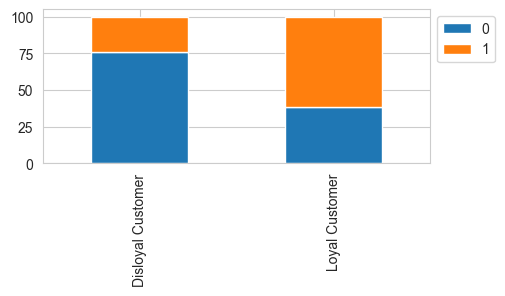

Overall_Experience          0          1
Type_Travel                             
Business Travel     41.696095  58.303905
Personal Travel     53.357703  46.642297
--------------------------------------------------


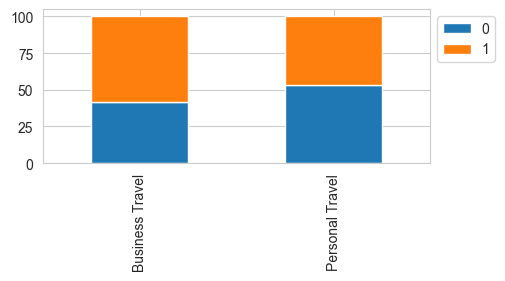

Overall_Experience          0          1
Travel_Class                            
Business            29.180452  70.819548
Eco                 60.078635  39.921365
--------------------------------------------------


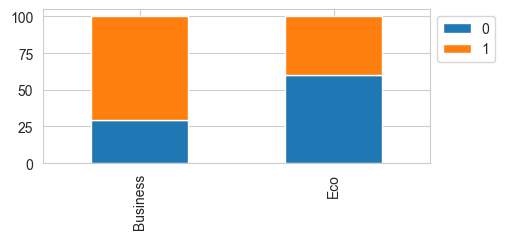

Overall_Experience          0          1
Seat_Comfort                            
Acceptable          64.604405  35.395595
Excellent            0.740113  99.259887
Extremely Poor       0.231014  99.768986
Good                34.867686  65.132314
Needs Improvement   64.279576  35.720424
Poor                54.916036  45.083964
--------------------------------------------------


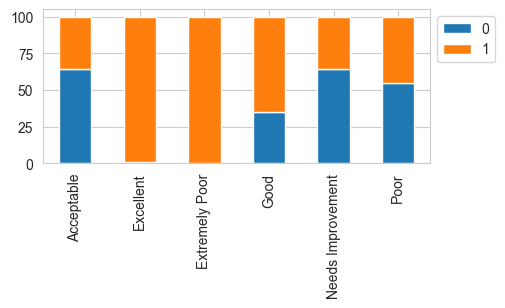

Overall_Experience          0          1
Seat_Class                              
Green Car           45.186044  54.813956
Ordinary            45.483981  54.516019
--------------------------------------------------


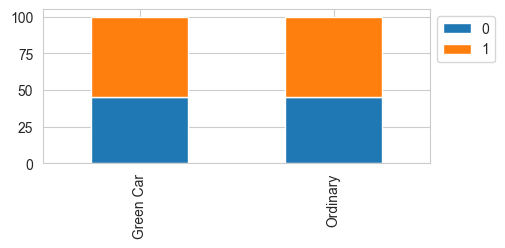

Overall_Experience               0          1
Arrival_Time_Convenient                      
Acceptable               46.451868  53.548132
Excellent                44.480887  55.519113
Extremely Poor           45.729455  54.270545
Good                     47.547767  52.452233
Needs Improvement        46.377585  53.622415
Poor                     41.177330  58.822670
--------------------------------------------------


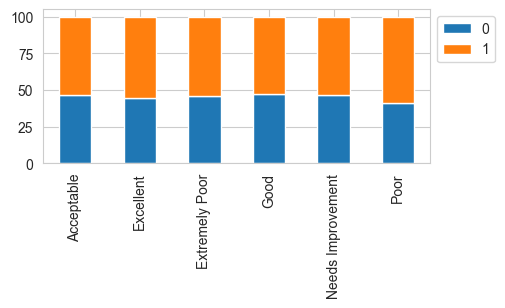

Overall_Experience          0          1
Catering                                
Acceptable          57.255794  42.744206
Excellent           21.887774  78.112226
Extremely Poor      22.480818  77.519182
Good                41.187601  58.812399
Needs Improvement   56.880632  43.119368
Poor                49.170154  50.829846
--------------------------------------------------


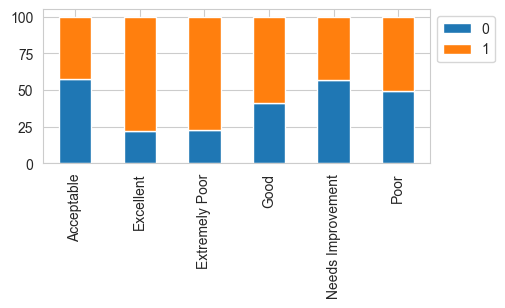

Overall_Experience          0           1
Platform_Location                        
Convenient          50.241877   49.758123
Inconvenient        39.041887   60.958113
Manageable          53.716957   46.283043
Needs Improvement   42.081651   57.918349
Very Convenient     34.711394   65.288606
Very Inconvenient    0.000000  100.000000
--------------------------------------------------


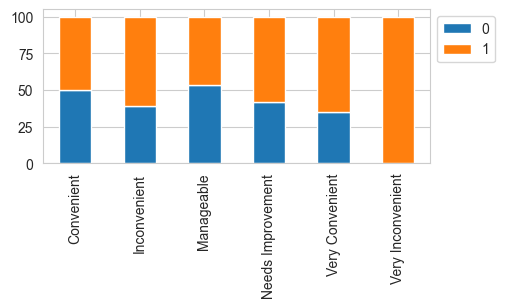

Overall_Experience            0          1
Onboard_Wifi_Service                      
Acceptable            48.995924  51.004076
Excellent             33.145746  66.854254
Extremely Poor        61.538462  38.461538
Good                  36.063061  63.936939
Needs Improvement     49.841804  50.158196
Poor                  73.624430  26.375570
--------------------------------------------------


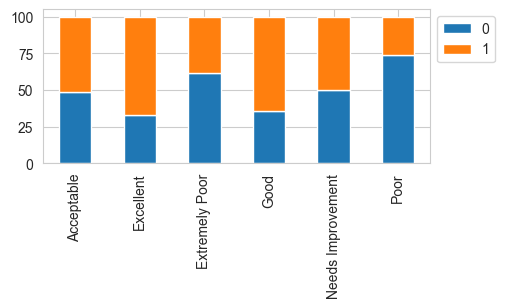

Overall_Experience             0          1
Onboard_Entertainment                      
Acceptable             80.153759  19.846241
Excellent               4.721863  95.278137
Extremely Poor         34.468284  65.531716
Good                   28.075938  71.924062
Needs Improvement      83.218440  16.781560
Poor                   78.752459  21.247541
--------------------------------------------------


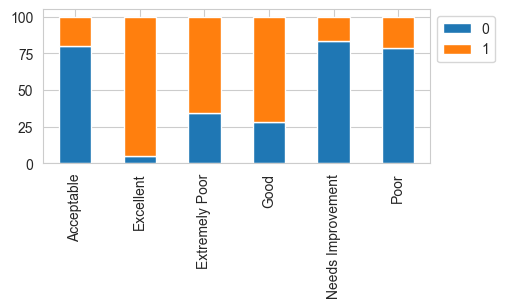

Overall_Experience           0          1
Online_Support                           
Acceptable           71.965355  28.034645
Excellent            22.696378  77.303622
Extremely Poor      100.000000   0.000000
Good                 31.922974  68.077026
Needs Improvement    70.275024  29.724976
Poor                 70.866529  29.133471
--------------------------------------------------


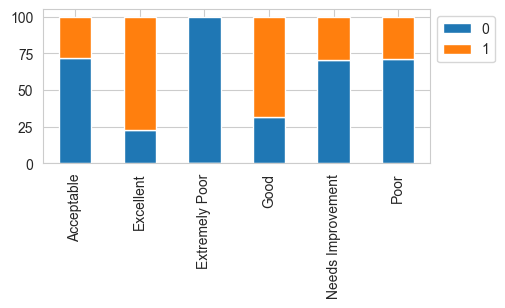

Overall_Experience               0          1
Ease_of_Online_Booking                       
Acceptable               64.423429  35.576571
Excellent                23.585516  76.414484
Extremely Poor          100.000000   0.000000
Good                     28.070843  71.929157
Needs Improvement        71.462118  28.537882
Poor                     80.773956  19.226044
--------------------------------------------------


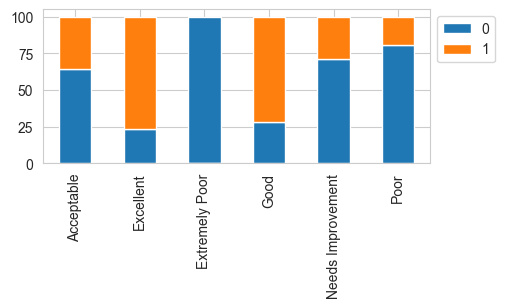

Overall_Experience           0          1
Onboard_Service                          
Acceptable           59.255160  40.744840
Excellent            23.655510  76.344490
Extremely Poor      100.000000   0.000000
Good                 35.301669  64.698331
Needs Improvement    66.259877  33.740123
Poor                 73.211030  26.788970
--------------------------------------------------


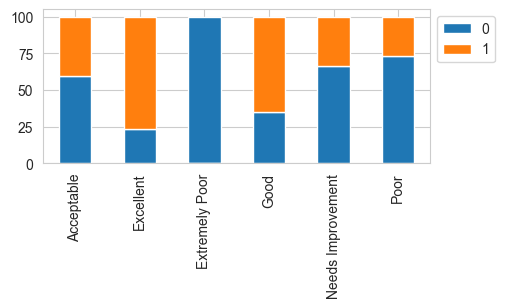

Overall_Experience          0          1
Legroom                                 
Acceptable          62.994385  37.005615
Excellent           29.176063  70.823937
Extremely Poor      31.176471  68.823529
Good                32.864565  67.135435
Needs Improvement   62.299245  37.700755
Poor                71.220715  28.779285
--------------------------------------------------


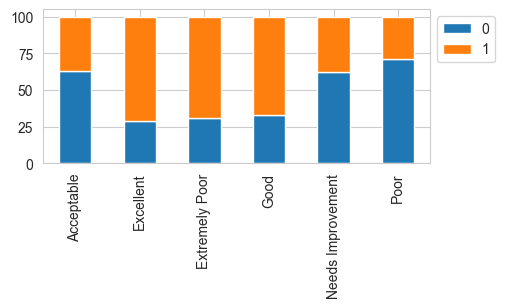

Overall_Experience          0          1
Baggage_Handling                        
Acceptable          68.694771  31.305229
Excellent           26.723840  73.276160
Good                41.157280  58.842720
Needs Improvement   60.200840  39.799160
Poor                57.442748  42.557252
--------------------------------------------------


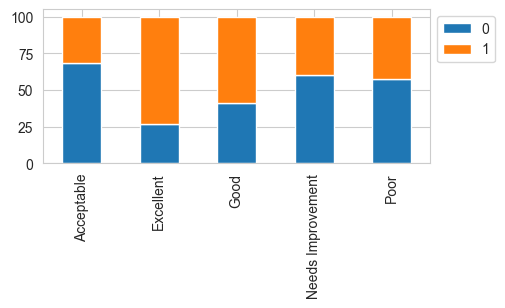

Overall_Experience           0          1
CheckIn_Service                          
Acceptable           43.382552  56.617448
Excellent            26.658520  73.341480
Extremely Poor      100.000000   0.000000
Good                 42.498679  57.501321
Needs Improvement    66.714209  33.285791
Poor                 68.007542  31.992458
--------------------------------------------------


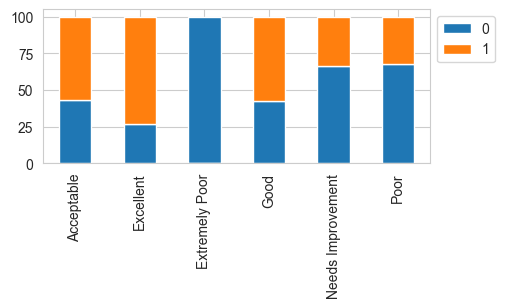

Overall_Experience           0          1
Cleanliness                              
Acceptable           67.963780  32.036220
Excellent            27.125475  72.874525
Extremely Poor      100.000000   0.000000
Good                 41.431676  58.568324
Needs Improvement    59.647155  40.352845
Poor                 59.080419  40.919581
--------------------------------------------------


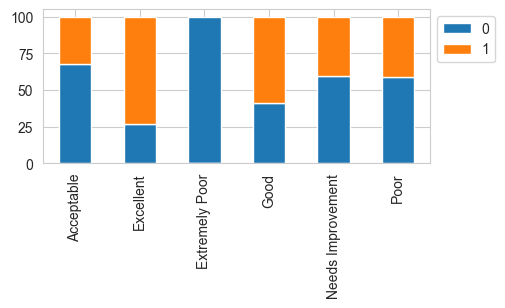

Overall_Experience           0          1
Online_Boarding                          
Acceptable           45.050056  54.949944
Excellent            26.938644  73.061356
Extremely Poor      100.000000   0.000000
Good                 34.735440  65.264560
Needs Improvement    71.920303  28.079697
Poor                 73.915771  26.084229
--------------------------------------------------


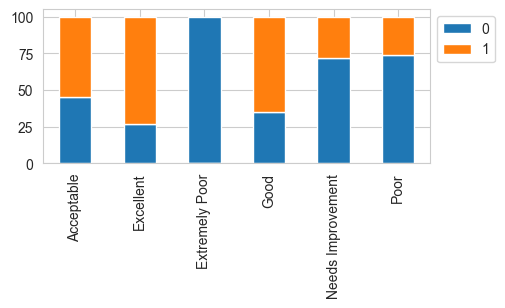

In [33]:
for col in X_TRAIN_categorical_cols.columns:
    stacked_barplot(df=df_TRAIN, feature=col)

- Gender: Female ("1" >> "0"), Male ("0" >~ "1")
- Customer_Type: Disloyal ("0" >> "1"), Loyal ("1" >> "0")
- Type_Travel: Business ("1" >~ "0"), Personal ("0" >~ "1")
- Travel_Class: Business ("1" >> "0"), Eco ("0" >> "1")
- Seat_Comfort: 
  - "1": Excellent, Extremely Poor
  - "1" > "0": Good
  - "0" > "1": Needs Improvement, Poor, Acceptable
- Seat_Class: Green Car ("1" > "0"), Ordinary ("1" > "0")
- Arrival_Time_Convenient: All ("1" > "0")
- Catering:
  - "1" > "0": Excellent, Good, Extremely Poor, Poor
  - "0" > "1": Needs Improvement, Acceptable
- Platform_Location:
  - "1": Very Inconvenient
  - "1" > "0": Inconvenient, Needs Improvement, Very Convenient 
  - "0" > "1": Convenient, Manageable
- Onboard_Wifi_Service:
  - "1" > "0": Acceptable, Excellent, Good, Needs Improvement
  - "0" > "1": Extremely Poor, Poor
- ...

### Bivariate - Stacked Barplots (Y ~ Numeric_X)

In [34]:
colnames = [col for col in X_TRAIN_encoded.columns if col != 'ID']
df_TRAIN_encoded = df_TRAIN.copy()
df_TRAIN_encoded[colnames] = X_TRAIN_encoded[colnames]

df_TRAIN_encoded.groupby(['Overall_Experience'])[colnames].agg(['mean', 'median'])

Age        Travel_Distance          \
                        mean median            mean  median   
Overall_Experience                                            
0                   37.49018   36.0     2025.826088  1953.5   
1                   41.01968   42.0     1939.962650  1882.0   

                   Departure_Delay_in_Mins        Arrival_Delay_in_Mins  \
                                      mean median                  mean   
Overall_Experience                                                        
0                                17.738600    0.0             18.392374   
1                                12.083107    0.0             12.196763   

                          Seat_Comfort         ...   Legroom         \
                   median         mean median  ...      mean median   
Overall_Experience                             ...                    
0                     0.0     2.466918    2.0  ...  3.053661    3.0   
1                     0.0     3.147883    4.0  ...  3.839112    4.0   

                   Baggage_Handling        CheckIn_Service        Cleanliness  \
                               mean median            mean median        mean   
Overall_Experience                                                              
0                          3.369435    3.0        2.978948    3.0    3.380779   
1                          3.968262    4.0        3.643822    4.0    3.972222   

                          Online_Boarding         
                   median            mean median  
Overall_Experience                                
0                     4.0        2.868532    3.0  
1                     4.0        3.752806    4.0  

[2 rows x 36 columns]

- Age: Age (1) > Age (0)
- Travel Distance: Distance (0) > Distance (1)
- Departure Delay: Delay (0) > Delay (1)
- Arrival Delay: Delay (0) > Delay (1)

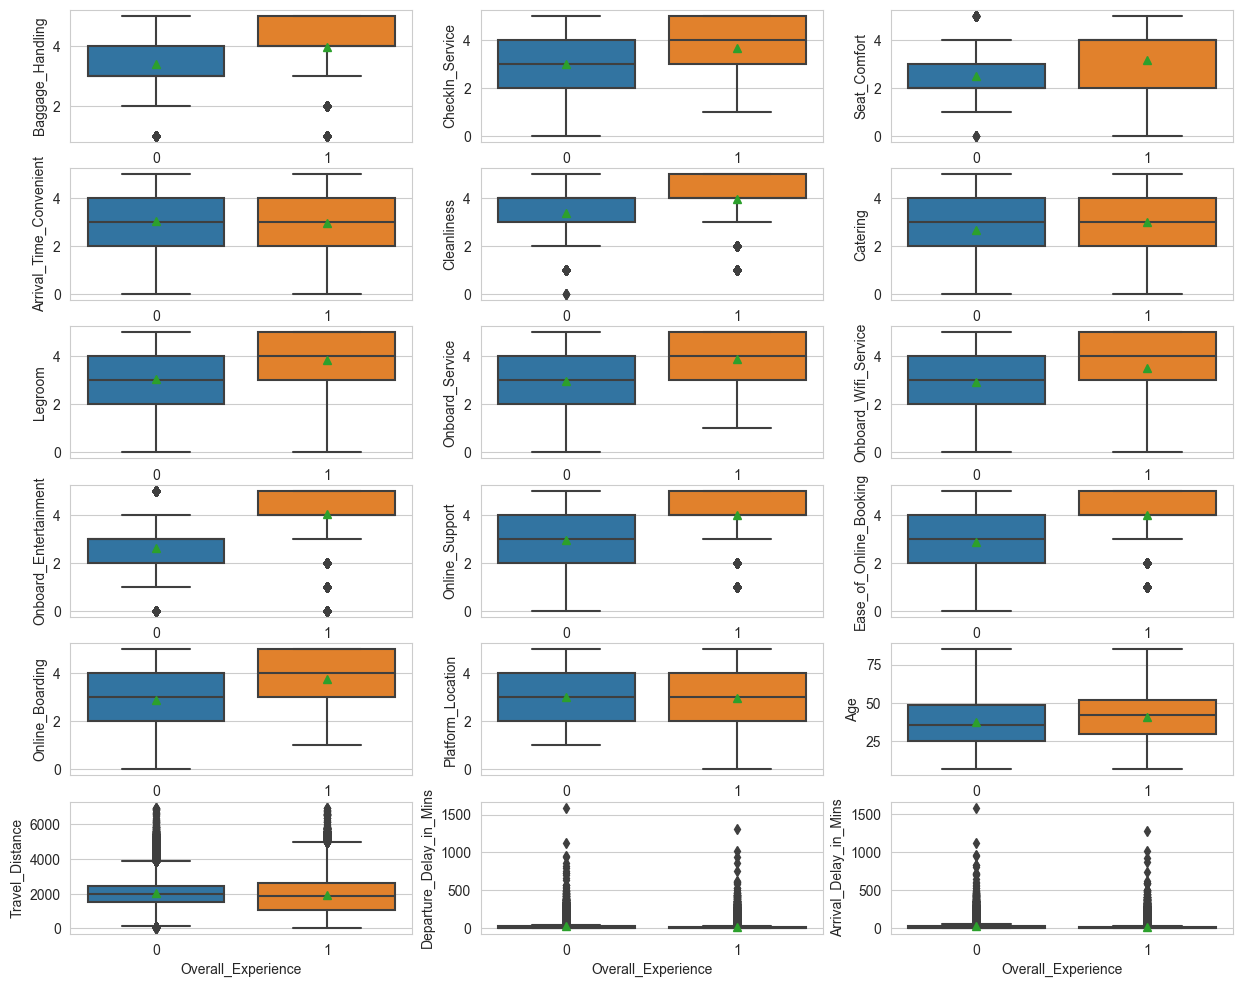

In [35]:
fig, axs = plt.subplots(
    nrows=6,  
    ncols=3,
    figsize=(15, 12)    
)

converted_vars = ordinal_feature_2 + [ordinal_feature_1] + ['Age', 'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']
for ax, var in zip(axs.flatten(), converted_vars):
    sns.boxplot(ax=ax, x="Overall_Experience", y=var, data=df_TRAIN_encoded, showmeans=True)